In [1]:
library(tidyverse)
library(feather)
library(viridis)
library(flowMeans)
library(FlowSOM)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Warning message:
“no DISPLAY variable so Tk is not available”Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:tidyr’:

    crossing

The following object is masked from ‘package:tibble’:

    as_data

In [16]:
set.seed(123)

In [17]:
df1 <- read_feather('data/xs1.feather')

In [18]:
colnames(df1)

[1] "FSC.A"          "SSC.A"          "CD45RA_BB515"   "CD94_BB630"    
 [5] "CD195_BB660"    "CD8_PerCP.Cy55" "CD38_BB790"     "CD127_AF647"   
 [9] "CD56_APCR700"   "HLADR_APCCy7"   "CD32_BUV395"    "CD16_BUV496"   
[13] "CD19_BUV563"    "IgD_BUV615"     "CD4_BUV661"     "CD64_BUV737"   
[17] "CD14_BUV805"    "CD11c_PE"       "CD13_PECF594"   "CD123_PECy5"   
[21] "PE.Cy5_5.A"     "CD25_PECy7"     "CD57_BV421"     "CD3_BV480"     
[25] "BV570.A"        "BV605.A"        "CD15_BV650"     "CD27_BV711"    
[29] "CD20_BV750"     "CD197_BV786"

In [32]:
df <- df1 %>% 
select(matches('(CD|Ig|HLA).*'))

In [33]:
dim(df)

[1] 10000    25

### K-means 

In [34]:
kmeans.df <- kmeans(df, centers=40)

In [35]:
pca.df <- prcomp(df, center=TRUE, scale=TRUE, rank=2)

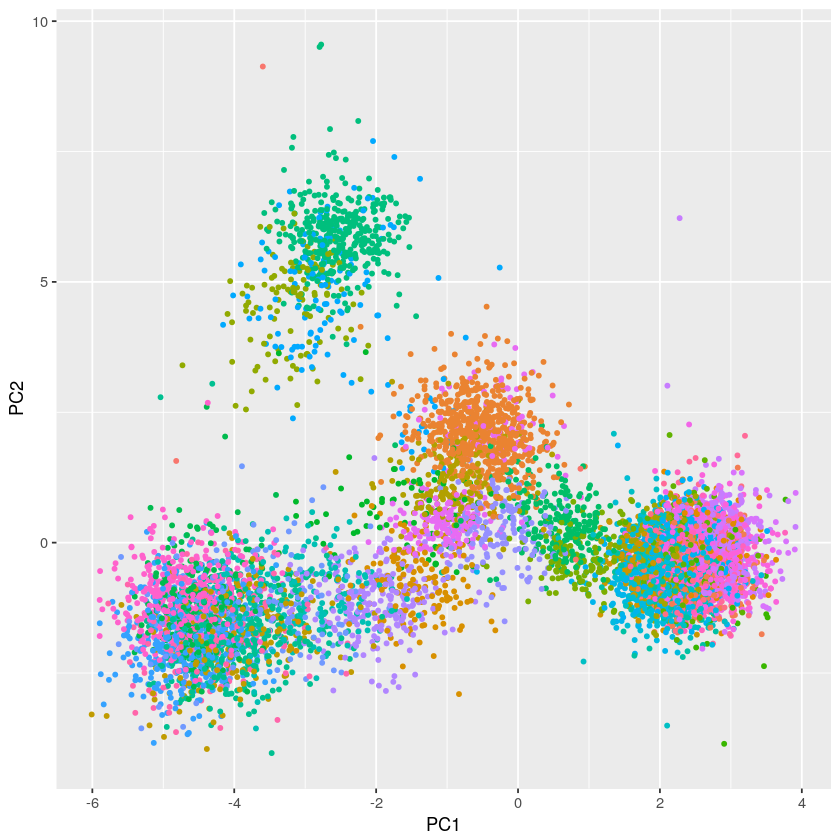

In [36]:
ggplot(as.data.frame(pca.df$x), 
       aes(x=PC1, y=PC2, 
           color=as.factor(kmeans.df$cluster))) +
geom_point(size=1) +
guides(color=FALSE)

In [37]:
colnames(df)

[1] "CD45RA_BB515"   "CD94_BB630"     "CD195_BB660"    "CD8_PerCP.Cy55"
 [5] "CD38_BB790"     "CD127_AF647"    "CD56_APCR700"   "HLADR_APCCy7"  
 [9] "CD32_BUV395"    "CD16_BUV496"    "CD19_BUV563"    "IgD_BUV615"    
[13] "CD4_BUV661"     "CD64_BUV737"    "CD14_BUV805"    "CD11c_PE"      
[17] "CD13_PECF594"   "CD123_PECy5"    "CD25_PECy7"     "CD57_BV421"    
[21] "CD3_BV480"      "CD15_BV650"     "CD27_BV711"     "CD20_BV750"    
[25] "CD197_BV786"

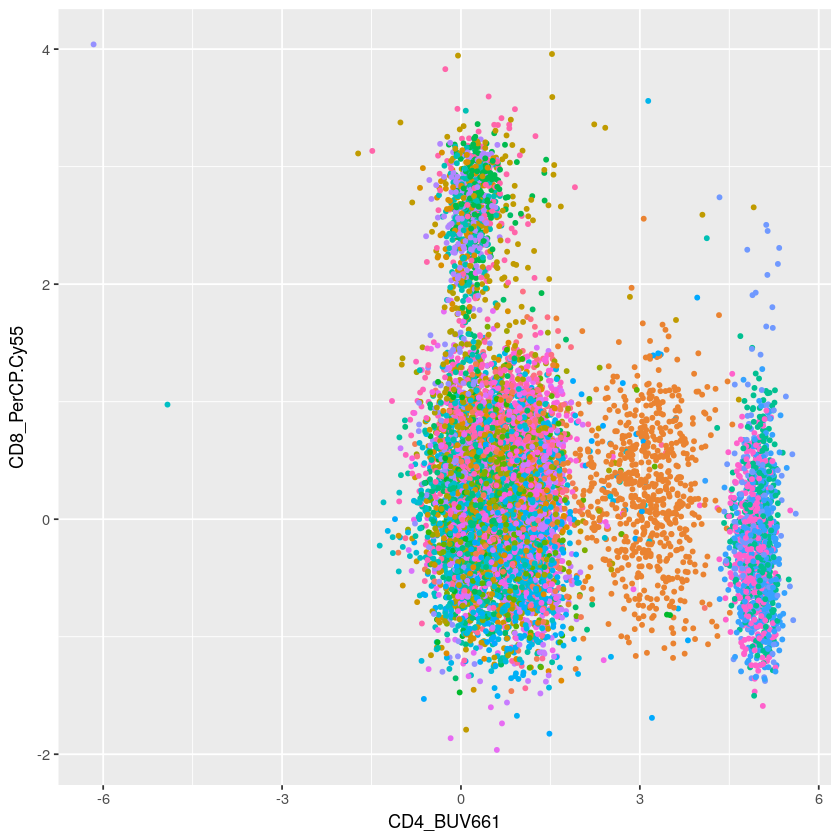

In [38]:
ggplot(df, 
       aes(x=CD4_BUV661, y=CD8_PerCP.Cy55, 
           color=as.factor(kmeans.df$cluster))) +
geom_point(size=1) +
guides(color=FALSE)

#### Sanity check

In [39]:
unif <- matrix(runif(20000,0,1),10000,2)

In [40]:
dim(unif)

[1] 10000     2

In [41]:
kmeans.data <- kmeans(unif, centers=40)

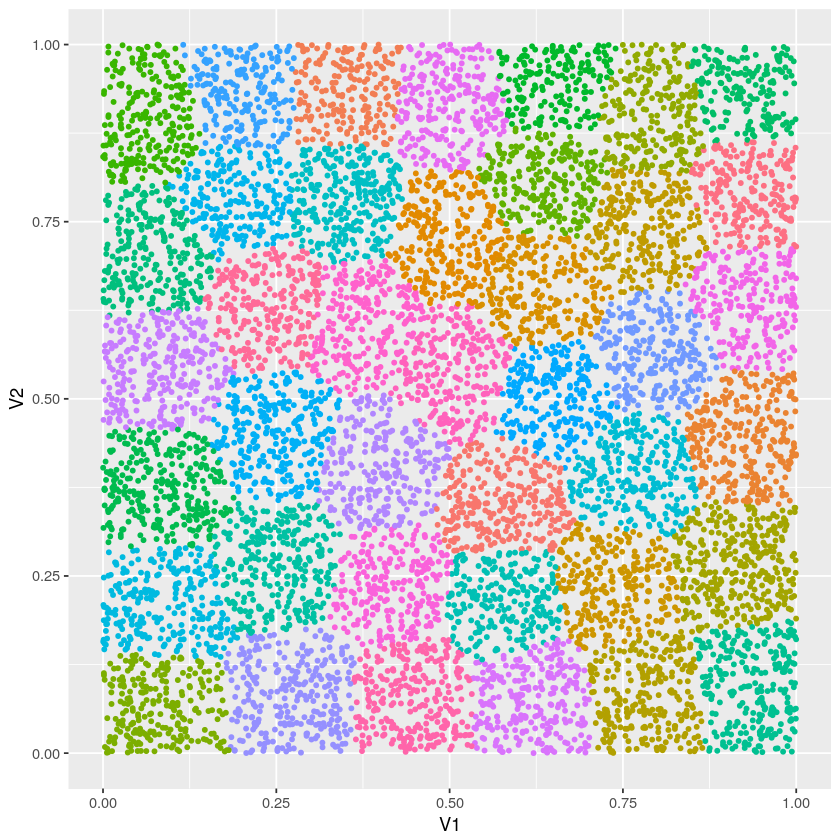

In [42]:
ggplot(as.data.frame(unif), 
       aes(x=V1, y=V2, 
           color=as.factor(kmeans.data$cluster))) +
geom_point(size=1) +
guides(color=FALSE)

### Using flowMeans: A flow-specific cluster method

In [44]:
flowMeans.df <- flowMeans(df, MaxN = 20)

In [45]:
summary(flowMeans.df)

flowMeans object with 11 populations:

5235 cells (%52.350) in population 1.
722 cells (%7.220) in population 2.
1146 cells (%11.460) in population 3.
260 cells (%2.600) in population 4.
609 cells (%6.090) in population 5.
225 cells (%2.250) in population 6.
220 cells (%2.200) in population 7.
398 cells (%3.980) in population 8.
281 cells (%2.810) in population 9.
475 cells (%4.750) in population 10.
429 cells (%4.290) in population 11.


In [46]:
head(pca.df$x)

PC1,PC2
-2.390836,-0.36928058
2.581719,-0.81518714
2.135410,0.02164485
-5.189883,-0.88091598
2.487081,-0.79384871
1.859794,-0.25790164


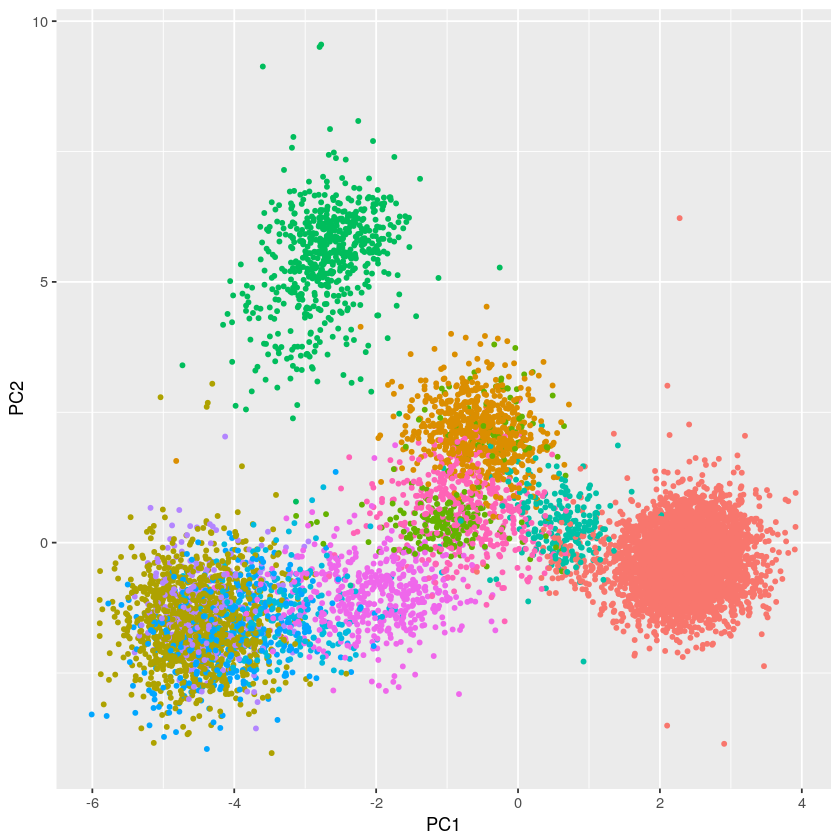

In [47]:
data <- as.data.frame(pca.df$x)

ggplot(data, 
       aes(x=PC1, y=PC2, color=as.factor(flowMeans.df@Label))) +
geom_point(size=1) +
guides(color=FALSE)

#### Sanity check

In [48]:
flowMeans.unif <- flowMeans(unif)

In [49]:
summary(flowMeans.unif)

flowMeans object with 2 populations:

4993 cells (%49.930) in population 1.
5007 cells (%50.070) in population 2.


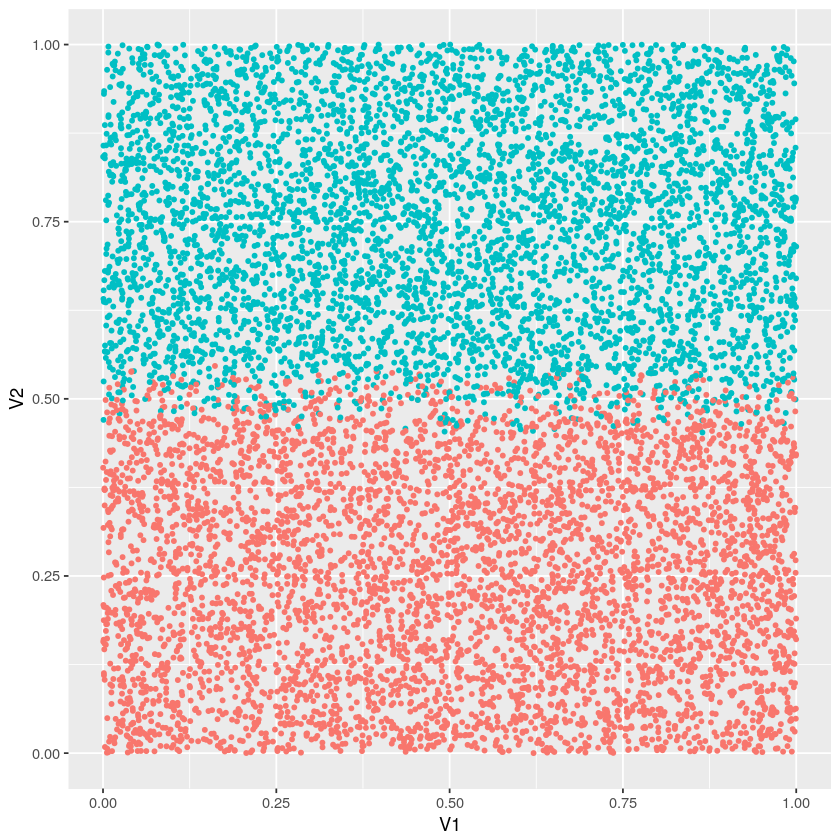

In [50]:
ggplot(as.data.frame(unif), 
       aes(x=V1, y=V2, 
           color=as.factor(flowMeans.unif@Label))) +
geom_point(size=1) +
guides(color=FALSE)